In [ ]:
# biblioteca de remoção
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181101 sha256=c3b258fa0823581be77a98cdb7c711f47a5740c4f1c2dd9c7e49ed1abf4714b2
  Stored in directory: /root/.cache/pip/wheels/f7/e2/c1/1c7fd8b261e72411f6509afb429c84532e40ddcd96074473f4
Successfully built pyod


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# gerar dados
from pyod.utils.data import generate_data

In [ ]:
# dados sinteticos outliners
dados_x, dados_y = generate_data(n_train=1000, train_only=True, n_features=2)
                                # amostras de treinamento, so dados de treinamento (sem teste), cada amostra terá 2 caracteristicas

# coletar os eixos
# selecionando todas as linhas e apenas a primeira coluna, transformando em varias linhas (-1) e so uma coluna (1)
eixo_x = dados_x[:,[0]].reshape(-1,1)
# selecionando todas as linhas e apenas a segunda coluna, transformando em varias linhas (-1) e so uma coluna (1)
eixo_y = dados_x[:,[1]].reshape(-1,1)

# tabela
# criação da tabela a partir dos dados do eixo x, onde ficara na coluna 'Eixo X'
tabela = pd.DataFrame(eixo_x, columns=['Eixo X'])
# nova coluna chamada 'Eixo Y' com os dados de eixo_y
tabela['Eixo Y'] = eixo_y
# nova coluna chamada 'Classe' com os dados de dados_y
tabela['Classe'] = dados_y # vai mostrar outliners como 1 e nao outliners como 0
tabela.head()

,Eixo X,Eixo Y,Classe
0,9.247007,9.677774,0.0
1,9.069835,8.996727,0.0
2,7.888721,8.769828,0.0
3,9.373601,8.424567,0.0
4,8.442967,8.995760,0.0


In [ ]:
tabela['Classe'].value_counts(normalize=True) * 100

0.0    90.0
1.0    10.0
Name: Classe, dtype: float64

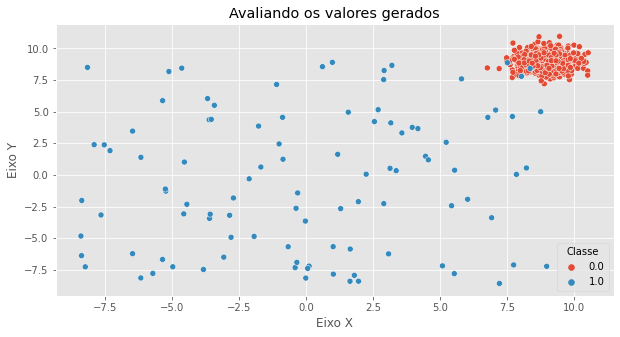

In [ ]:
# plotar um grafico
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Avaliando os valores gerados')

sns.scatterplot(data=tabela, x = 'Eixo X', y = 'Eixo Y', hue= 'Classe'); # hue: divisão 

os azuis são os outliers

In [ ]:
tabela.describe()

,Eixo X,Eixo Y,Classe
count,1000.000000,1000.000000,1000.00000
mean,8.098444,8.030384,0.10000
std,3.134313,3.333171,0.30015
min,-8.395866,-8.566828,0.00000
25%,8.457780,8.450594,0.00000
50%,8.934096,8.892730,0.00000
75%,9.320741,9.260453,0.00000
max,10.538146,10.944404,1.00000


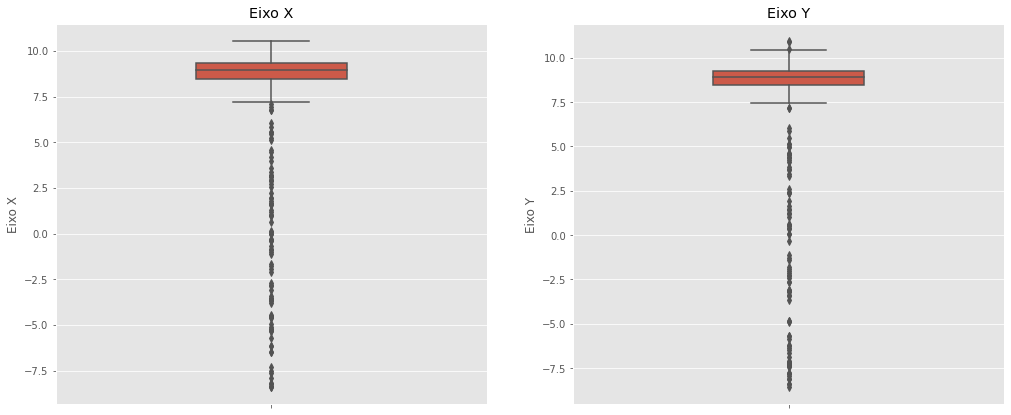

In [ ]:
# plotar dois graficos
plt.figure(figsize=(17, 7));

# fig 1
plt.subplot(1,2,1)
plt.title('Eixo X')
sns.boxplot(data=tabela, y = 'Eixo X', width=0.35)

# fig 2
plt.subplot(1,2,2)
plt.title('Eixo Y')
sns.boxplot(data=tabela, y = 'Eixo Y', width=0.35)

In [ ]:
from math import isqrt
# extrair os outliers

# 1o quartil
q1 = np.percentile(tabela['Eixo X'], 25, interpolation = 'midpoint')
print(f'Primeiro quartil: {q1}')

# 3o quartil
q3 = np.percentile(tabela['Eixo X'], 75, interpolation = 'midpoint')
print(f'Terceiro quartil: {q3}')

# intervalo interquartil
iqr = q3 - q1
print(f'Intervalo: {iqr}')


Primeiro quartil: 8.45772643088219
Terceiro quartil: 9.321305984173215
Intervalo: 0.8635795532910251


In [ ]:
# verificar os valores que serao excluidos, so irao permanecer os que estao entre os quartis
superior = tabela['Eixo X'] >= (q1 + 1.5 * iqr)
inferior = tabela['Eixo X'] <= (q3 - 1.5 * iqr)

print('Valores que sao outliers')
print(np.where(superior))
print(np.where(inferior))

Valores que sao outliers
(array([  8,  22,  45,  57,  59,  62,  71,  85,  93,  94, 101, 105, 123,
       141, 175, 181, 191, 199, 211, 219, 221, 224, 233, 239, 244, 248,
       253, 255, 267, 271, 273, 282, 290, 291, 295, 298, 320, 331, 339,
       355, 362, 413, 424, 442, 459, 465, 467, 482, 490, 495, 496, 500,
       522, 555, 562, 612, 619, 625, 635, 639, 651, 659, 668, 670, 680,
       691, 695, 710, 712, 737, 745, 751, 753, 760, 769, 770, 771, 783,
       787, 826, 844, 848, 863, 868, 870, 874, 886]),)
(array([  2,  36,  37,  96, 112, 148, 154, 204, 207, 229, 249, 264, 275,
       277, 284, 300, 328, 378, 380, 398, 419, 489, 492, 494, 532, 572,
       598, 600, 609, 618, 624, 627, 638, 662, 674, 676, 706, 733, 746,
       802, 811, 845, 880, 894, 900, 901, 902, 903, 904, 905, 906, 907,
       908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920,
       921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933,
       934, 937, 938, 939, 940, 941, 942, 943, 944, 94

In [ ]:
acima = q3 + 1.5 * iqr
abaixo = q1 - 1.5 * iqr

# retorna os indices das colunas onde a condição dos parenteses é verdadeira
dados_superiores = np.where(tabela['Eixo X']>=acima)
dados_inferiores = np.where(tabela['Eixo X']<=abaixo)

# retirando
novabase = tabela.drop(dados_superiores[0])
novabase = tabela.drop(dados_inferiores[0])

In [ ]:
print(f'Antes havia { tabela.shape[0] }')
print(f'Agora temos { novabase.shape[0] }')
print(f'Foi retirado { tabela.shape[0] - novabase.shape[0] } registros')

Antes havia 1000
Agora temos 909
Foi retirado 91 registros


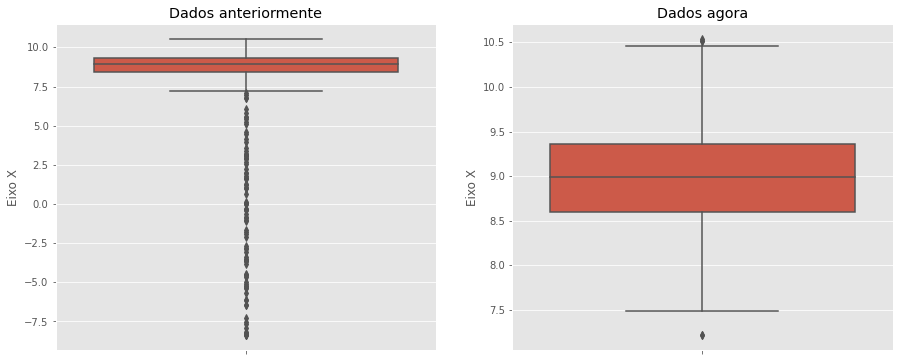

In [ ]:
# comparativo em gráfico
plt.figure( figsize=(15, 6))

# antes
plt.subplot(1,2,1)
plt.title('Dados anteriormente')
sns.boxplot(data=tabela, y = 'Eixo X')

# depois
plt.subplot(1,2,2)
plt.title('Dados agora')
sns.boxplot(data=novabase, y = 'Eixo X')